In [25]:
# Follows the style and format of desimodel.io.py
_gfa = None
def load_gfa():
    """Returns GFA table from desimodel/data/focalplane/gfa.ecsv"""
    global _gfa
    from astropy.table import Table
    # os is imported already in the desimodel io.py
    import os
    if _gfa is None:
        gfaFile = os.path.join(os.environ['DESIMODEL'], 'data', 'focalplane', 'gfa.ecsv')
        _gfa = Table.read(gfaFile, format = 'ascii.ecsv')
    return _gfa

def plot_gfa(gfa, petal = None):
    """
    Plots the GFA at a certain petal or all the GFAs depending on 
    the respective parameters.
    Parameters
    ----------
    gfa: Astropy Table object with the petal number, corner number, and x, y, z, and q 
    coordinates of the GFAs, as well as the radius in degrees and mm of each corner of the GFAs.
    petal: optional integer parameter which specifies which petal to plot
    """
    title('GFA Overhead View')
    plt.xlabel('mm')
    plt.ylabel('mm')
    gfacoord = numpy.zeros(shape=(4, 2))
    
    if(type(petal) != int and petal != None):
        raise TypeError("Please enter an integer value")
    elif(petal == None):
        counter = 0
        for i in range(40):
            gfacoord[counter % 4] = [gfa['X'][i], gfa['Y'][i]]
            plot(gfa['X'][i], gfa['Y'][i], 'k.')
            counter += 1
            if ((counter % 4) == 0):
                draw_single_gfa(gfacoord)
    elif(petal < 0 or petal > 9):
        raise ValueError("Please enter a petal value between 0 and 9")
    elif(petal <= 9 and petal >= 0):
        index = petal * 4
        for j in range(4):
            gfacoord[j] = [gfa['X'][index], gfa['Y'][index]]
            plot(gfa['X'][index], gfa['Y'][index], 'k.')
            index += 1
        draw_single_gfa(gfacoord)
    else:
        raise Exception("Please enter an integer between 0 and 9")
    plot()
    
def draw_single_gfa(gfacoord):
    """
    Draws a single GFA given a 4X2 array of coordinates for the four corners of a GFA
    Parameters
    ----------
    gfaCoord: 4X2 array of x and y coordinates with each row representing a corner of the GFA
    """
    # Prints all of the GFA coordinates for debugging
    #print(GFAcoord) 
    gfapolygon = Polygon(gfacoord)
    plt.gca().add_patch(gfapolygon)
    
    
def plot_focal_plane():
    """
    Plots a 2D representation of the focal plane with the 5000 fiberpositioners
    and the 10 GFAs
    """
    #%pylab
    #import desimodel.io
    # Plots the location of each of the fiber positioners
    fp = desimodel.io.load_fiberpos()
    plot(fp['X'],fp['Y'], 'g.')
    
    gfa = load_gfa()
    plot_gfa(gfa)
    title('Focal Plane Overhead View')
    


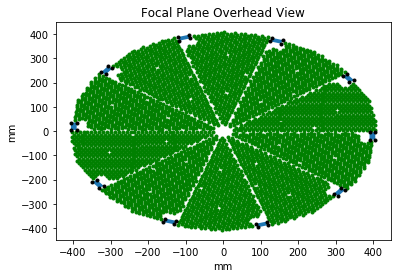

In [26]:
# Debugging lines to test if functions work

#import desimodel.io
#%pylab inline
#fp = desimodel.io.load_fiberpos()
#plot(fp['X'], fp['Y'], 'g.')
#gfa = load_gfa()
#plot_gfa(gfa, 2)

plot_focal_plane()
